In [ ]:
#Please Run all cells in order and one by one to use each interactive plot separately.

In [5]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
#code in this cell is from https://mljar.com/blog/jupyter-notebook-hide-code/

# 4.3 Total transmission of the wave function at a potential well.

This notebook's purpose is to visualize, exemplify and expand the results of exercise $4.3$:

4.3 - Let us consider a free particle that interacts with a rectangular potential well, $V (x) = −V0$, $x ∈ [0, a]$. Let us further assume that the reflection coefficient is null for this case. Compare the relative values of the wavelength, the wave function and the probability density in the three different zones (x < 0; 0 < x < a; x > a).

The potential function $V(x)$ in this problem can be written as:


$$\begin{align}
    V(x)=
    \begin{cases}
        0 & \text{if}\ x<0    \\
      -V_0 & \text{if}\ 0<x<a  \\
        0 & \text{if}\ a<x    \\
    \end{cases}
\end{align}$$

To solve this problem, we must apply Schrödinger's Equation to find the eigenfunctions in each of the three zones. Relations can be found between the function constants at each zone as the wave function is continuous and derivable, in particular in $x = 0$ and $x = a$. If we first apply Schrödinger's time independent equation to find each eigenfunction and then we take into account their time evolution, we obtain:


$$\begin{align}
    \Psi(x,t)=
    \begin{cases}
        A e^{-i \frac{ħ k^2}{2 m}} e^{ikx} & \text{if}\ x<0    \\
        A e^{-i \frac{ħ k^2}{2 m}} \left(\cos(\frac{\pi n x }{a})+i\frac{a k}{\pi n}\sin(\frac{\pi n x }{a})\right) & \text{if}\ 0<x<a  \\
        A (-1)^n e^{-i \frac{ħ k^2}{2 m}} e^{ikx} & \text{if}\ a<x    \\
    \end{cases}
\end{align}$$

Where A is an arbitrary parameter, as this wave function can not be normalized (from now on, we will assume A = 1). 
The following relations can also be found:

$$\begin{align}
    k = k_1 =\frac{\sqrt{2mE}}{ħ} \hspace{1.5cm} k_2 = \frac{n\pi}{a} = \frac{\sqrt{2m(E+V_0)}}{ħ}
\end{align}$$

Please note that these two relations in a potential well, where $V_0 > 0$, lead to the relation:

$$\begin{align}
        k < \frac{\pi n}{a}
\end{align}$$

This relation is needed for the obtained wave function to be a correct solution of Schrödinger's equation, and therefore will be dynamically imposed over the graph's sliders.

We can visualize the wave function and a non-normalized probability density function in the following figures:

## 2D representation of $|ψ(x)|^2$
In the following figure, a non-normalized $|ψ(x)|^2$ is shown. This function can be integrated on two finite regions to compare the probabiliy of finding the studied particle on each one, but can not be used to calculate the probability of finding the particle on any finite region, as it can not be normalized. Please note that the result is not time dependant because ψ(x,t) is an eigenfunction in this system and therefore $|ψ(x)|$ is constant.

<IPython.core.display.Javascript object>


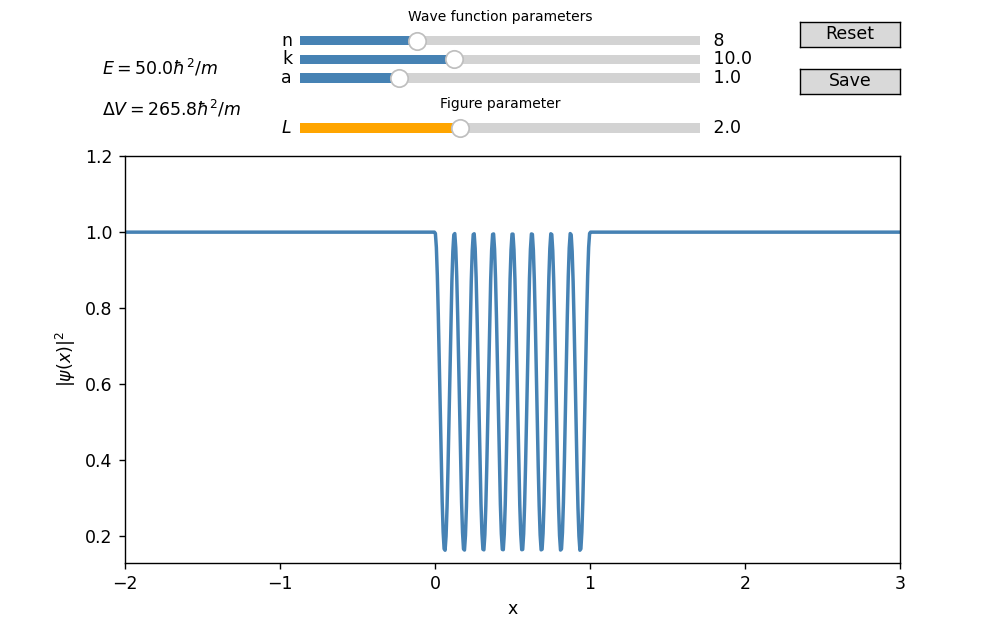

In [9]:
import cmath as cm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button

#We activate the interactive mode in order to display animations
%matplotlib notebook

#We define the time dependent wave function
#Please note that we use heaviside's function to define the wave function in the three regions
def Psi1(X,t):
    Psi1 = np.exp(-I*k**2*t/2)*(np.exp(I*k*X)*np.heaviside(-X,0) + 
           (-1)**n*np.exp(I*k*(X-a))*np.heaviside(X-a,0) + 
           (np.cos(n*pi*X/a) + (I*k*a)/(n*pi)*np.sin(n*pi*X/a))*np.heaviside(X,1)*np.heaviside(a-X,1))
    return Psi1

#Program constants
pi = cm.pi
I = complex(0,1)


# -----------------------------------------------------------------------------------------------

def find_lims(Y):
#Input: Y, Array of Real numbers 
#Output: lim_inf, lim_sup, limits for a graphic representation of Y
    ymax = np.max(Y)
    ymin = np.min(Y)
    
    if(ymax >= 0 and ymin >= 0):
        lim_inf, lim_sup = ymin*0.8, ymax*1.2
    elif(ymax > 0 and ymin < 0):
        lim_inf, lim_sup = ymin*1.2, ymax*1.2
    elif(ymax < 0 and ymin < 0):
        lim_inf, lim_sup = ymin*1.2, ymax*0.8
    
    return lim_inf, lim_sup

# -----------------------------------------------------------------------------------------------

def interactive_rho_x(Psi):
# Input: Psi(X,t), wave function we want to represent (function of the array X and the time t).
#                  this wave function must have n,a,k as implicit parameters
# Output: fig (figure), b_reset, b_save (two buttons). These output variables must be referenced in the main program.
#         the data will be shown automatically as an interactive plot when the function is executed.
    
        # ------------------------------------------------------------
        
    def initialize_main_plot():
    #This function is used to initialize the main plot axis, and the details of this initialization must be changed here
        #We represent rho_x at t=0, as it is an invariant for eigenfuctions
        #We compute the needed variables to initialize
        X = np.linspace(x0,xf,100*n)
        rho_x = abs(Psi(X,t))**2 #Note that this variable is not exactly the probability density, as Psi is not normalized

        #We plot the preset distribution
        line, = ax.plot(X,rho_x,lw=2,color = 'steelblue')
        line.set_data(X,rho_x)

        #We add axis labels and limits to the initial figure
        ax.set_xlim(x0,xf)   
        ymin, ymax = find_lims(rho_x)
        ax.set_ylim(ymin,ymax)
        ax.set_xlabel('x')
        ax.set_ylabel('$|ψ(x)|^2$')
        return ax, line
    
    def actualize_main_plot():
    #This function is used to initialize the main plot axis, and the details of this initialization must be changed here
        #We calculate the new data and actualize the represented line
        X = np.linspace(x0,xf,200*n)
        rho_x = abs(Psi(X,t))**2
        line.set_data(X,rho_x)
        
        #We compute and apply the new limits in the main figure
        ymin, ymax = find_lims(rho_x)
        ax.set_xlim(x0,xf)
        ax.set_ylim(ymin,ymax)
        return ax, line

    
    def create_sliders():
    #This function defines and specifies the details of the sliders needed in this interactive plot
    #Any details referring the definition and graphic details of the sliders must be changed inside this function
        #We create new axes for the sliders
        ax_n = fig.add_axes([0.3, 0.92, 0.4, 0.03])
        ax_n.set_title('Wave function parameters',fontsize=8)
        ax_k = fig.add_axes([0.3, 0.89, 0.4, 0.03])
        ax_a = fig.add_axes([0.3, 0.86, 0.4, 0.03])

        ax_x0 = fig.add_axes([0.3, 0.78, 0.4, 0.03])
        ax_x0.set_title('Figure parameter',fontsize=8)

        #We create the sliders as widgets
        s_n = Slider(ax=ax_n, label='n', valmin=1, valmax=25, valinit=n, valstep = 1, valfmt=' %0.0f',facecolor='steelblue')
        s_k = Slider(ax=ax_k, label='k', valmin=0.5, valmax=pi*n/a, valinit=k, valfmt=' %1.1f ', facecolor='steelblue')
        s_a = Slider(ax=ax_a, label='a', valmin=0.5, valmax=pi*n/k, valinit=a, valfmt=' %1.1f ', facecolor='steelblue')
        s_x0 = Slider(ax=ax_x0, label='$L$', valmin=0, valmax=5, valinit=-x0, valfmt=' %1.1f ', facecolor='orange')    
    
        #We return all axes and sliders created in the function
        return ax_n, ax_k, ax_a, ax_x0, s_n, s_k, s_a, s_x0
    
    def make_annotations(actualize=False):
    #This function defines and specifies the details of the annotations needed in this interactive plot
    #Any details referring the definition and graphic details of the annotations must be changed inside this function
        E = k**2/2
        V = ((n*pi/a)**2 - k**2)/2
    #We define the annotations as global in order to be able to define and actualize the annotations in the same function.
        global En_annotation, Pot_annotation
        
        if (actualize==False):
            En_annotation = ax.annotate("$E = {:10.1f} ħ^2/m $".format(E), xy=(-0.03, 1.2), xycoords="axes fraction")
            Pot_annotation = ax.annotate("$ΔV = {:10.1f} ħ^2/m $".format(V), xy=(-0.03, 1.1), xycoords="axes fraction")
        elif (actualize==True):
            En_annotation.set_text("$E = {:10.1f} ħ^2/m $".format(E))
            Pot_annotation.set_text("$ΔV = {:10.1f} ħ^2/m $".format(V))
        
        return En_annotation, Pot_annotation
    
    def generate_buttons():
    #This function defines and specifies the details of the buttons needed in this interactive plot
    #Any details referring the definition and graphic details of the buttons must be changed inside this function
        #We create an axis for the reset button and define its widget
        ax_reset = fig.add_axes([0.8,0.925,0.1,0.04])
        b_reset = Button(ax_reset, 'Reset', hovercolor='0.975')

        def reset(event):
        #Resets all sliders
            s_n.reset()
            s_k.reset()
            s_a.reset()
            s_x0.reset()
            return
        #We call the reset function when the reset button is used
        b_reset.on_clicked(reset)

        #We create an axis for the save button and define its widget
        ax_save = fig.add_axes([0.8,0.85,0.1,0.04])
        b_save = Button(ax_save, 'Save', hovercolor='0.975')
        
        def save_fig(event):
        #Saves the actual figure
            plt.savefig('Potential_Well_rhox.png')
            return
        #We call the save function when the reset button is used
        b_save.on_clicked(save_fig)
        
        #We return the two buttons
        return b_reset, b_save
    
    def update(val):
    #Function used to update the figure when sliders are used
        #We update each global parameter in the wave function
        global n,k,a,x0,xf
        n = round(s_n.val)
        k = s_k.val
        a = s_a.val
        x0 = -s_x0.val
        xf = a + abs(x0)        

        #In order to have a rectangular well, we must verify that k1 < k2 = pi*n/a
        #If this condition is not met, the defined wave function is not valid and total transmision cannot be achieved

        #To avoid non valid simulations that might be confusing, we dinamically change the slider's limits
        s_n.valmin = max(k*a/pi,1)
        s_a.valmax = pi*n/k
        s_k.valmax = pi*n/a

        #We actualize the current slider values if they are out of bounds and give priority to the n and a values
        if k > s_k.valmax:
            k = s_k.valmax
            s_k.set_val(k)
        if a > s_a.valmax:
            a = s_a.valmax
            s_a.set_val(a)
        if n < s_n.valmin:
            n = s_n.valmin
            s_n.set_val(n)

        #We actualize the visible limit in the axes of the sliders
        ax_n.set_xlim(s_n.valmin,s_n.valmax)
        ax_a.set_xlim(s_a.valmin,s_a.valmax)
        ax_k.set_xlim(s_k.valmin,s_k.valmax)


        #We actualize the main plot
        ax, line = actualize_main_plot()

        #We actualize the annotations
        En_annotation, Pot_annotation = make_annotations(actualize=True)

        plt.show()
        return
    
        # ------------------------------------------------------------
    
    #We choose the preset wave function and figure parameters
    global k, n, a, x0, xf, t
    k = 10
    n = 8
    a = 1

    x0 = -2
    xf = a+abs(x0)
    t = 0
    
    #We define figure's axes
    fig, ax = plt.subplots(figsize=(8,5))
    fig.subplots_adjust(bottom = 0.1, top = 0.75)
    
    #We create the desired sliders
    ax_n, ax_k, ax_a, ax_x0, s_n, s_k, s_a, s_x0 = create_sliders()
    
    #We initialize the main plot (its initial representation and graphic details)
    ax, line = initialize_main_plot()
    
    #We generate the annotations
    En_annotation, Pot_annotation = make_annotations()

    #We call the update function when any slider is used
    s_n.on_changed(update)
    s_k.on_changed(update)
    s_a.on_changed(update)
    s_x0.on_changed(update)
    
    b_reset, b_save = generate_buttons()
    
    plt.show()
    #Although it might seem redundant to return the figure and buttons after showing them, referencing them 
    # in the main program is needed for the interactive plot to work properly
    return fig, b_reset, b_save

# -----------------------------------------------------------------------------------------------

fig, b_reset, b_save = interactive_rho_x(Psi1)

## 2D representation of $ψ(x,t)$
In the following figure, the time dependent real and imaginary parts of the eigen function are shown. Note that this allows to better visualize the wavelenghts at each region (as the x distance between two consecutive maximums) and shows how the wavefunction's phase evolves faster for higher energy absolute values.

<IPython.core.display.Javascript object>


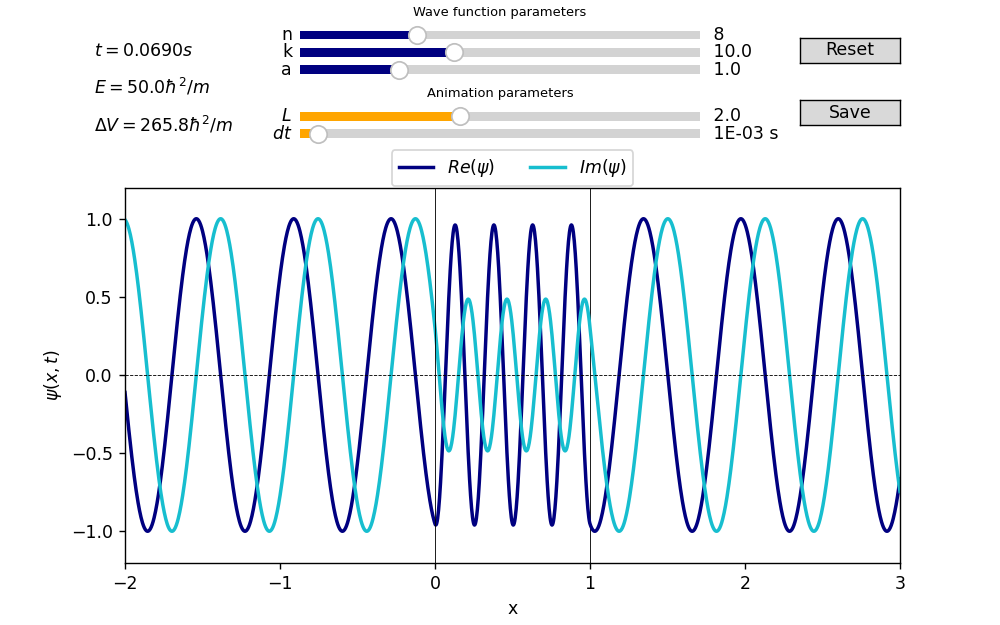

In [8]:
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

#We enable the interactive mode for the next graphic
%matplotlib notebook


# -----------------------------------------------------------------------------------------------

def find_lims_abs(Y):
#Input: Y, Array of Real numbers 
#Output: lim_inf, lim_sup, limits for a graphic representation of the imaginary and real part of Y (wavefunction array)
    ymax = np.max(Y)
    ymin = -ymax
    lim_inf, lim_sup = ymin*1.2, ymax*1.2

    return lim_inf, lim_sup

# -----------------------------------------------------------------------------------------------

def animate_interactive_Psi_2D(Psi,t0,total_frames):
# Input: Psi(X,t), wave function we want to represent (function of the array X and the time t).
#                  this wave function must have n,a,k as implicit parameters
# Output: fig (figure), b_reset, b_save (two buttons). These output variables must be referenced in the main program.
#         the data will be shown automatically as an interactive plot when the function is executed.
    
        # ------------------------------------------------------------

    #We define some wrapped functions to have a better program structure 
    def create_sliders():
    #This function defines and specifies the details of the sliders needed in this interactive plot
    #Any details referring the definition and graphic details of the sliders must be changed inside this function
        #We create new axes for the sliders
        ax_n = fig.add_axes([0.3, 0.93, 0.4, 0.0275])
        ax_n.set_title('Wave function parameters',fontsize=7.5)
        ax_k = fig.add_axes([0.3, 0.9025, 0.4, 0.0275])
        ax_a = fig.add_axes([0.3, 0.8750, 0.4, 0.0275])

        ax_x0 = fig.add_axes([0.3, 0.8000, 0.4, 0.0275])
        ax_x0.set_title('Animation parameters',fontsize=7.5)
        ax_dt = fig.add_axes([0.3, 0.7725, 0.4, 0.0275])

        #We create the sliders as widgets
        s_n = Slider(ax=ax_n, label='n', valmin=1, valmax=25, valinit=n, valstep = 1, valfmt=' %0.0f',facecolor='navy')
        s_k = Slider(ax=ax_k, label='k', valmin=0.5, valmax=pi*n/a, valinit=k, valfmt=' %1.1f ', facecolor='navy')
        s_a = Slider(ax=ax_a, label='a', valmin=0.5, valmax=pi*n/k, valinit=a, valfmt=' %1.1f ', facecolor='navy')
        s_x0 = Slider(ax=ax_x0, label='$L$', valmin=0, valmax=5, valinit=-x0, valfmt=' %1.1f ', facecolor='orange')
        s_dt = Slider(ax=ax_dt,label='$dt$',valmin=0.0001,valmax=0.02,valinit=dt,valfmt=' %.E s',facecolor='orange')    
        
        #We return all axes and sliders created in the function
        return ax_n, ax_k, ax_a, ax_x0, ax_dt, s_n, s_k, s_a, s_x0, s_dt
    
    
    def make_annotations(actualize=False):
    #This function defines and specifies the details of the annotations needed in this interactive plot
    #Any details referring the definition and graphic details of the annotations must be changed inside this function
        t = 0
        E = k**2/2
        V = ((n*pi/a)**2 - k**2)/2
    #We define the annotations as global in order to be able to define and actualize the annotations in the same function.
        global En_annotation, Pot_annotation, time_annotation
        
        if (actualize==False):
            time_annotation = ax.annotate("$t = {:10.4f} s $".format(t), xy=(-0.04, 1.35), xycoords="axes fraction")
            En_annotation = ax.annotate("$E = {:10.1f} ħ^2/m $".format(E), xy=(-0.04, 1.25), xycoords="axes fraction")
            Pot_annotation = ax.annotate("$ΔV = {:10.1f} ħ^2/m $".format(V), xy=(-0.04, 1.15), xycoords="axes fraction")
        elif (actualize==True):
            En_annotation.set_text("$E = {:10.1f} ħ^2/m $".format(E))
            Pot_annotation.set_text("$ΔV = {:10.1f} ħ^2/m $".format(V))
        
        #We return all annotations created in the function
        return En_annotation, Pot_annotation, time_annotation
    
    def generate_buttons():
    #This function defines and specifies the details of the buttons needed in this interactive plot
    #Any details referring the definition and graphic details of the buttons must be changed inside this function
        #We create an axis for the reset button and define its widget
        ax_reset = fig.add_axes([0.8,0.900,0.1,0.04])
        b_reset = Button(ax_reset, 'Reset', hovercolor='0.975')
        
        def reset(event):
        #Resets all sliders and time
            global t
            s_n.reset()
            s_k.reset()
            s_a.reset()
            s_x0.reset()
            s_dt.reset()
            t = 0
            return
        #We call the reset function when the reset button is used
        b_reset.on_clicked(reset)
        
        #We create an axis for the save button and define its widget
        ax_save = fig.add_axes([0.8,0.800,0.1,0.04])
        b_save = Button(ax_save, 'Save', hovercolor='0.975')

        def save(event):
        #Saves the actual figure
            anim.save('Potential_Well_Psi_Re_vs_Im_2D.gif',PillowWriter(fps=20),dpi=100)
            return
        
        #We call the save function when the reset button is used
        b_save.on_clicked(save)
        
        #We return all buttons in the function
        return b_reset, b_save
        
        
    def initialize_anim():
#   Function used to initialize the animation figure (Format and graphic details)
#       We restart the time
        global t
        t = t0
        
#       We add some graphic details
        ax.set_xlabel('x')
        ax.set_ylabel('$ψ(x,t)$')
        ax.legend(bbox_to_anchor=(0., 1.02, 1.,.102),loc = 'upper center',ncol=2)
        ax.axhline(y = 0,color = 'black',linestyle = '--',lw = 0.5)
        ax.axvline(x = 0,color = 'black',lw = 0.5)
        
#       We compute the initial information
        X = np.linspace(x0,xf,200*n)
        Y = Psi(X,t0)
        
#       We use the initial function limits
        global ymin, ymax
        ymin, ymax = find_lims_abs(np.abs(Y))
        ax.set_xlim(x0,xf)
        ax.set_ylim(ymin,ymax)
        
#       We represent both functions and a vertical line at x = a
        line0.set_data([a,a], [ymin,ymax])
        line1.set_data(X, np.real(Y))
        line2.set_data(X, np.imag(Y))  
        
        #We return all line functions
        return line0, line1, line2
    

    def animate(frame_num):
#   Function we iterate to generate each frame
#       We compute all needed variables each frame
        global t,X,Y
        t = t + dt
        X = np.linspace(x0,xf,200*n)
        Y = Psi(X,t)
        ymin, ymax = find_lims_abs(np.abs(Psi(X,t0)))

#       We actualize the time annotation
        time_annotation.set_text("$t = {:10.4f} s $".format(t))

#       We represent both functions and a vertical line at x = a
        line0.set_data([a,a], [ymin,ymax])
        line1.set_data(X, np.real(Y))
        line2.set_data(X, np.imag(Y))      
        
        plt.show()
        #We return all line functions
        return line0, line1, line2
    
    
    def update(val):
#     #Function used to update the figure when sliders are used
#         #We update each global parameter in the wave function
        global n,k,a,x0,xf,ymin,ymax,dt
        n = round(s_n.val)
        k = s_k.val
        a = s_a.val
        x0 = -s_x0.val
        xf = a + abs(x0)
        dt = s_dt.val
        
        #In order to have a rectangular well, we must verify that k1 < k2 = pi*n/a
        #If this condition is not met, the defined wave function is not valid and total transmision cannot be achieved.

        #To avoid non valid simulations that might be confusing, we dinamically change the slider's limits
        s_n.valmin = max(k*a/pi,1)
        s_a.valmax = pi*n/k
        s_k.valmax = pi*n/a

        #We actualize the current slider values if they are out of bounds and give priority to the n and a values
        if k > s_k.valmax:
            k = s_k.valmax
            s_k.set_val(k)
        if a > s_a.valmax:
            a = s_a.valmax
            s_a.set_val(a)
        if n < s_n.valmin:
            n = s_n.valmin
            s_n.set_val(n)

        #We actualize the visible limit in the axes of the sliders
        s_n.ax.set_xlim(s_n.valmin,s_n.valmax)
        s_a.ax.set_xlim(s_a.valmin,s_a.valmax)
        s_k.ax.set_xlim(s_k.valmin,s_k.valmax)

        #We compute and apply the new limits in the main figure
        X = np.linspace(x0,xf,200*n)
        Y = Psi(X,t0)
#         ymin, ymax = find_lims_abs(np.abs(Y))
        ax.set_xlim(x0,xf)
        ax.set_ylim(ymin,ymax)

        #We actualize the annotations
        En_annotation, Pot_annotation, time_annotation = make_annotations(actualize=True)
        return
    
    
        # ------------------------------------------------------------
    
    #Function's Main Program
    #We initialize wave function's variables
    global n,k,a,x0,xf,t,dt
    n = 8
    k = 10
    a = 1

    #We initialize figure's variables
    t = t0
    dt = 0.001
    x0 = -2
    xf = a + abs(x0)
    
    #We define figure's axes and main line
    fig, ax = plt.subplots(figsize=(8,5),dpi=100)
    fig.subplots_adjust(bottom = 0.1, top = 0.70)
    line0, = ax.plot([], [], lw=0.5, color = 'black')
    line1, = ax.plot([], [], lw=2, label = '$Re(ψ)$', color = 'navy')
    line2, = ax.plot([], [], lw=2, label = '$Im(ψ)$', color = 'tab:cyan')    
    
    #We create the animation with preset parameters
    anim = FuncAnimation(fig, animate, init_func=initialize_anim, frames = total_frames, interval = 50, blit=True)
    
    #We create the desired sliders
    ax_n, ax_k, ax_a, ax_x0, ax_dt, s_n, s_k, s_a, s_x0, s_dt = create_sliders()
    
    #We generate the two buttons
    b_reset, b_save = generate_buttons()   
    
    #We generate the annotations
    En_annotation, Pot_annotation, time_annotation = make_annotations()
    
    #We call the update function when any slider is used
    s_n.on_changed(update)
    s_k.on_changed(update)
    s_a.on_changed(update)
    s_x0.on_changed(update) 
    s_dt.on_changed(update)
    
    plt.show()
    #Although it might seem redundant to return the animation and buttons after showing them, referencing them 
    #  in the main program is needed for the interactive plot to work properly
    return anim, b_reset, b_save


# -----------------------------------------------------------------------------------------------

#We define the initial time and number of total frames
#A high total_frames value is discouraged if saving the animation is intended 
t0 = 0
total_frames = 300

anim, b_reset, b_save = animate_interactive_Psi_2D(Psi1,t0,total_frames)

## 3D representation of $ψ(x,t)$
In the following figure, the time dependent real and imaginary parts of the eigen function are shown in a 3D plot. This representation helps to grasp the complex nature of wavefunctions in  quantum physics.

<IPython.core.display.Javascript object>


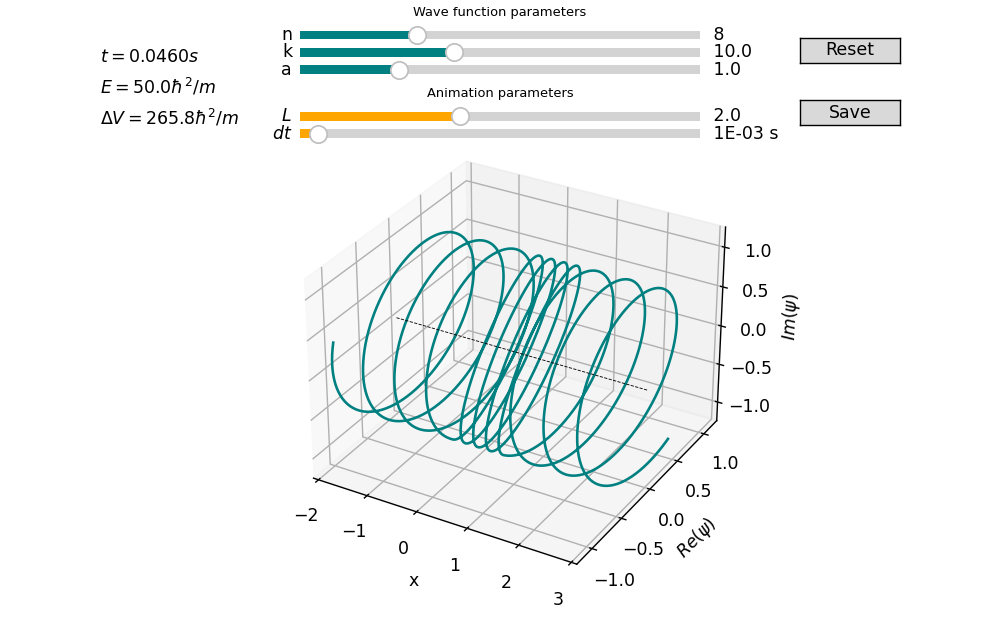

In [3]:
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

#We enable the interactive mode for the next graphic
%matplotlib notebook


# -----------------------------------------------------------------------------------------------

def find_lims_abs(Y):
#Input: Y, Array of Real numbers 
#Output: lim_inf, lim_sup, limits for a graphic representation of the imaginary and real part of Y (wavefunction array)
    ymax = np.max(Y)
    ymin = -ymax
    lim_inf, lim_sup = ymin*1.2, ymax*1.2

    return lim_inf, lim_sup

# -----------------------------------------------------------------------------------------------

def animate_interactive_Psi_3D(Psi,t0,total_frames):
# Input: Psi(X,t), wave function we want to represent (function of the array X and the time t).
#                  this wave function must have n,a,k as implicit parameters
# Output: fig (figure), b_reset, b_save (two buttons). These output variables must be referenced in the main program.
#         the data will be shown automatically as an interactive plot when the function is executed.
    
        # ------------------------------------------------------------

    #We define some wrapped functions to have a better program structure 
    def create_sliders():
    #This function defines and specifies the details of the sliders needed in this interactive plot
    #Any details referring the definition and graphic details of the sliders must be changed inside this function
        #We create new axes for the sliders
        ax_n = fig.add_axes([0.3, 0.93, 0.4, 0.0275])
        ax_n.set_title('Wave function parameters',fontsize=7.5)
        ax_k = fig.add_axes([0.3, 0.9025, 0.4, 0.0275])
        ax_a = fig.add_axes([0.3, 0.8750, 0.4, 0.0275])

        ax_x0 = fig.add_axes([0.3, 0.8000, 0.4, 0.0275])
        ax_x0.set_title('Animation parameters',fontsize=7.5)
        ax_dt = fig.add_axes([0.3, 0.7725, 0.4, 0.0275])

        #We create the sliders as widgets
        s_n = Slider(ax=ax_n, label='n', valmin=1, valmax=25, valinit=n, valstep = 1, valfmt=' %0.0f',facecolor='teal')
        s_k = Slider(ax=ax_k, label='k', valmin=0.5, valmax=pi*n/a, valinit=k, valfmt=' %1.1f ', facecolor='teal')
        s_a = Slider(ax=ax_a, label='a', valmin=0.5, valmax=pi*n/k, valinit=a, valfmt=' %1.1f ', facecolor='teal')
        s_x0 = Slider(ax=ax_x0, label='$L$', valmin=0, valmax=5, valinit=-x0, valfmt=' %1.1f ', facecolor='orange')
        s_dt = Slider(ax=ax_dt,label='$dt$',valmin=0.0001,valmax=0.02,valinit=dt,valfmt=' %.E s',facecolor='orange')    
        
        #We return all axes and sliders created in the function
        return ax_n, ax_k, ax_a, ax_x0, ax_dt, s_n, s_k, s_a, s_x0, s_dt
    
    
    def make_annotations(actualize=False):
    #This function defines and specifies the details of the annotations needed in this interactive plot
    #Any details referring the definition and graphic details of the annotations must be changed inside this function
        t = 0
        E = k**2/2
        V = ((n*pi/a)**2 - k**2)/2
    #We define the annotations as global in order to be able to define and actualize the annotations in the same function.
        global En_annotation, Pot_annotation, time_annotation
        
        if (actualize==False):
            time_annotation = ax.annotate("$t = {:10.4f} s $".format(t), xy=(0.1, 0.90), xycoords="figure fraction")
            En_annotation = ax.annotate("$E = {:10.1f} ħ^2/m $".format(E), xy=(0.1, 0.85), xycoords="figure fraction")
            Pot_annotation = ax.annotate("$ΔV = {:10.1f} ħ^2/m $".format(V), xy=(0.1, 0.80), xycoords="figure fraction")
        elif (actualize==True):
            En_annotation.set_text("$E = {:10.1f} ħ^2/m $".format(E))
            Pot_annotation.set_text("$ΔV = {:10.1f} ħ^2/m $".format(V))
        
        #We return all annotations created in the function
        return En_annotation, Pot_annotation, time_annotation
    
    
    def generate_buttons():
    #This function defines and specifies the details of the buttons needed in this interactive plot
    #Any details referring the definition and graphic details of the buttons must be changed inside this function
        #We create an axis for the reset button and define its widget
        ax_reset = fig.add_axes([0.8,0.900,0.1,0.04])
        b_reset = Button(ax_reset, 'Reset', hovercolor='0.975')

        def reset(event):
        #Resets all sliders
            global t
            t = t0
            s_n.reset()
            s_k.reset()
            s_a.reset()
            s_x0.reset()
            s_dt.reset()
            ax.view_init()
            return
        #We call the reset function when the reset button is used
        b_reset.on_clicked(reset)

        
        #We create an axis for the save button and define its widget
        ax_save = fig.add_axes([0.8,0.800,0.1,0.04])
        b_save = Button(ax_save, 'Save', hovercolor='0.975')
        
        def save_fig(event):
        #Saves the actual figure
            plt.savefig('Potential_barrier_rhox.png')
            return
        #We call the save function when the reset button is used
        b_save.on_clicked(save_fig)
        
        #We return the two buttons
        return b_reset, b_save
        
        
    def initialize_anim():
#   Function used to initialize the animation figure (Format and graphic details)
#       We add some graphic details
        ax.set_xlabel('x')
        ax.set_ylabel('$Re(ψ)$')
        ax.set_zlabel('$Im(ψ)$')
        
#       We compute the initial information
        X = np.linspace(x0,xf,200*n)
        ymin,ymax = find_lims_abs(Psi(X,t0))
        
#       We use the initial function limits
        ax.set_xlim3d(x0, xf)
        ax.set_ylim3d(ymin,ymax)
        ax.set_zlim3d(ymin,ymax)
        
    #   We avoid too many ticks at the axes
        plt.locator_params(nbins=5)
        
        #We return the axis line
        return line0, line,
    

    def animate(frame_num):
#   Function we iterate to generate each frame
#       We compute all needed variables each frame and actualize the line
        global t,X,Y
        t = t + dt
    
#       We actualize the function's information
        X = np.linspace(x0,xf,200*n)
        Y = np.real(Psi(X,t))
        Z = np.imag(Psi(X,t))

        line.set_data(X, Y)
        line.set_3d_properties(Z)

#       We add a line at (x,0,0) to better visualize the complex axis
        line0.set_data([x0,xf],[0,0])
        line0.set_3d_properties([0,0])

#       We actualize the time annotation
        time_annotation.set_text("$t = {:10.4f} s $".format(t))     
        
        #We return all line functions
        return line0, line,
    
    
    def update(val):
    #Function used to update the figure when sliders are used
        #We update each global parameter in the wave function
        global n,k,a,x0,xf,ymin,ymax,dt
        n = round(s_n.val)
        k = s_k.val
        a = s_a.val
        x0 = -s_x0.val
        xf = a + abs(x0)
        dt = s_dt.val
        
        #In order to have a rectangular well, we must verify that k1 < k2 = pi*n/a
        #If this condition is not met, the defined wave function is not valid and total transmision cannot be achieved.

        #To avoid non valid simulations that might be confusing, we dinamically change the slider's limits
        s_n.valmin = max(k*a/pi,1)
        s_a.valmax = pi*n/k
        s_k.valmax = pi*n/a

        #We actualize the current slider values if they are out of bounds and give priority to the n and a values
        if k > s_k.valmax:
            k = s_k.valmax
            s_k.set_val(k)
        if a > s_a.valmax:
            a = s_a.valmax
            s_a.set_val(a)
        if n < s_n.valmin:
            n = s_n.valmin
            s_n.set_val(n)

        #We actualize the visible limit in the axes of the sliders
        s_n.ax.set_xlim(s_n.valmin,s_n.valmax)
        s_a.ax.set_xlim(s_a.valmin,s_a.valmax)
        s_k.ax.set_xlim(s_k.valmin,s_k.valmax)

        #We compute and apply the new limits in the main figure
        X = np.linspace(x0,xf,200*n)
        ymin, ymax = find_lims_abs(Psi(X,t0))
        
        ax.set_xlim3d(x0, xf)
        ax.set_ylim3d(ymin,ymax)
        ax.set_zlim3d(ymin,ymax)

        #We actualize the annotations
        En_annotation, Pot_annotation, time_annotation = make_annotations(actualize=True)
        
        plt.show()
        return
    
    
        # ------------------------------------------------------------
    
    #Function's Main Program
    #We initialize wave function's variables
    global n,k,a,x0,xf,t,dt
    n = 8
    k = 10
    a = 1

    #We initialize figure's variables
    t = t0
    dt = 0.001
    x0 = -2
    xf = a + abs(x0)
    
    #We define figure's axes and main line
    fig = plt.figure(figsize=(8,5),dpi=100)
    fig.subplots_adjust(bottom = 0.05, top = 0.80)
    ax = fig.add_subplot(111,projection='3d')

    line, = ax.plot([], [], [], lw=1.5, color = 'teal')
    line0, = ax.plot([], [], [], 'k--', lw=0.5)
    
    #We create the animation with preset parameters
    anim = FuncAnimation(fig, animate, init_func=initialize_anim, frames = total_frames, interval = 50, blit=True)
    
    #We create the desired sliders
    ax_n, ax_k, ax_a, ax_x0, ax_dt, s_n, s_k, s_a, s_x0, s_dt = create_sliders()
    
    #We generate the two buttons
    b_reset, b_save = generate_buttons()   
    
    #We generate the annotations
    En_annotation, Pot_annotation, time_annotation = make_annotations()
    
    #We call the update function when any slider is used
    s_n.on_changed(update)
    s_k.on_changed(update)
    s_a.on_changed(update)
    s_x0.on_changed(update) 
    s_dt.on_changed(update)
    
    plt.show()
    #Although it might seem redundant to return the animation and buttons after showing them, referencing them 
    #  in the main program is needed for the interactive plot to work properly
    return anim, b_reset, b_save


# -----------------------------------------------------------------------------------------------

#We define the initial time and number of total frames
#A high total_frames value is discouraged if saving the animation is intended 
t0 = 0
total_frames = 300

anim, b_reset, b_save = animate_interactive_Psi_3D(Psi1,t0,total_frames)